<a href="https://colab.research.google.com/github/GiovaniNobre/Imoveis_SP/blob/main/graficos_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando biblioteca Pandas e "apelidando" de pd
import pandas as pd


In [ ]:
#Conectando com o google drive para usar arquivo salvo nele como banco de dados
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Salvando o caminho do arquivo em "URL"
url = '/content/drive/MyDrive/BigData/moradias_SP (1).csv'

In [ ]:
#"Usando pd(Pandas) para ler o arquivo CSV e salvar na variavel df
df = pd.read_csv(url)

In [ ]:
df

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


In [ ]:
#Renomeando algumas colunas do nosso DataFrame
df = df.rename(columns={
    'address':'endereco',
    'district':'bairro',
    'bedrooms':'quartos',
    'type':'tipo',
    'rent':'aluguel',

})

In [ ]:
# Alterando valores nulos:
df.fillna(0, inplace=True)

In [ ]:
#unindo as linhas por bairro
df['bairro'].unique()

array(['Belenzinho', 'Vila Marieta', 'Pinheiros', ..., 'Vila Elvira',
       'Jardim Vitoria Regia', 'Retiro Morumbi'], dtype=object)

In [ ]:
#agrupando por bairro
bairro = df['bairro'].unique()

In [ ]:
type(bairro)

numpy.ndarray

In [ ]:
df.columns.values

array(['endereco', 'bairro', 'area', 'quartos', 'garage', 'tipo',
       'aluguel', 'total'], dtype=object)

In [ ]:
df_Selecionado = ['bairro', 'area', 'tipo',
       'aluguel', 'total']

In [ ]:
#agrupando nosso DataFrame por bairro e por numero de quartos e mostrando os valores medios por bairro
df.groupby(['bairro','quartos'])[['aluguel','total']].mean().head()

aluguel        total
bairro    quartos                          
Aclimação 1        1851.000000  2503.541667
          2        2965.266667  3834.133333
          3        4456.666667  5538.666667
          4        4500.000000  5091.000000
          5        7000.000000  8579.000000

In [ ]:
#Selecionando apenas as colunas aluguel, quartos, tipo de imovel
aluguel_Selecionados = aluguel_por_bairro.filter(['total', 'bedrooms','type'])

In [ ]:
#Ordenar por bairros com imoveis mais caros
aluguel_Selecionados.sort_values(['total','type'],ascending=False).head(10)

,,total,bedrooms
district,type,,
Cidade Jardim,Casa,20380.000000,4.000000
Alphaville Residencial Plus,Casa,20270.000000,4.000000
Alphaville Residencial Dois,Casa em condomínio,17410.000000,6.000000
Jardim Cordeiro,Casa,16670.000000,3.000000
Jardim Vitoria Regia (zona Oeste),Apartamento,16480.000000,4.000000
Bela Aliança,Casa,16420.000000,4.000000
Jardim Vitória Régia,Apartamento,16183.333333,3.666667
Brooklin Paulista,Casa em condomínio,16052.500000,4.000000
Alto de Pinheiros,Casa,15956.250000,4.375000


In [ ]:
# Faça uma análise que mostre qual a média do valor total de aluguel
# por tipo de moradia:
df.groupby('type')[["total"]].mean().sort_values('total',ascending=False).head(10)

,total
type,
Casa em condomínio,4576.232365
Apartamento,4435.428413
Casa,3824.244280
Studio e kitnet,2668.280232


In [ ]:
# Mostrar média e valores totais por tipo de imóvel e quantidade de quartos:
grafico_valor_tipo = df.groupby(['type','bedrooms'])[[ 'total']].mean().sort_values(['type','bedrooms'], ascending=False)

<Axes: >

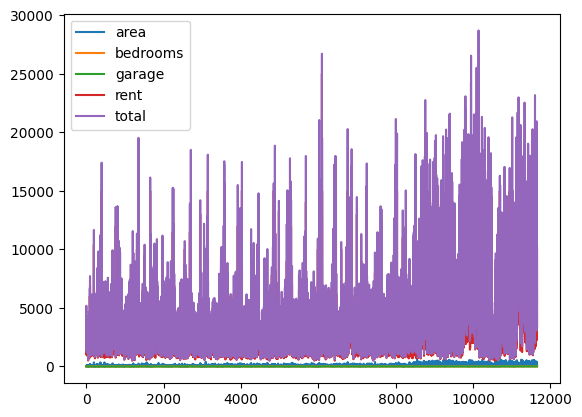

In [ ]:
# Criando gráficos Pandas através da função plot()
# Usando sem parâmetros definidos:
df.plot()

<Axes: title={'center': 'Média de valores por tipo de imóvel e numero de quartos'}, xlabel='Valor total médio', ylabel='Tipo do imóvel'>

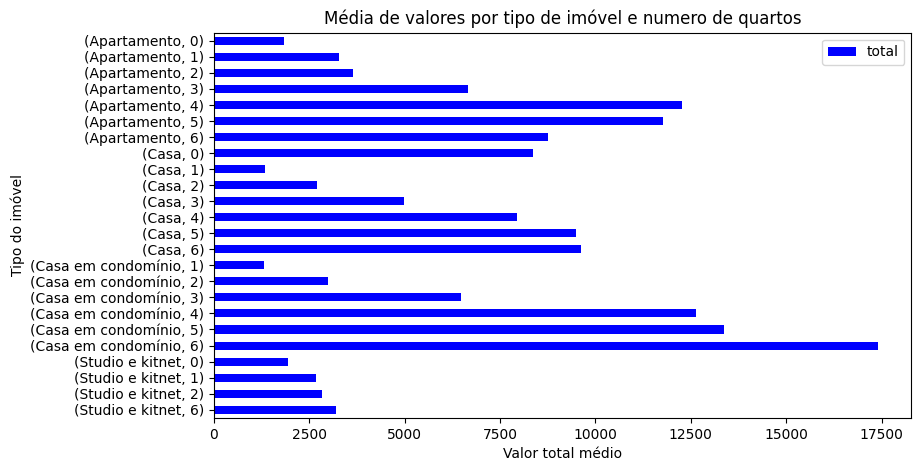

In [ ]:
# Podemos criar um outro DataFrame com agrupamentos, filtros e ordenações que irão
# auxiliar na criação dos gráficos:
grafico_valor_tipo.plot(
    title="Média de valores por tipo de imóvel e numero de quartos",
    kind="barh",
    color="blue",
    ylabel="Tipo do imóvel",
    xlabel="Valor total médio",
    figsize=(9,5) # Largura x Altura
)

In [ ]:
#Criando DataSet atraves de uma consulta
#O DataSet mostra a relação entre preço e tamanho do imovel
area_total = df.groupby("area")[["total"]].mean()

<Axes: title={'center': 'Area do imovel X Valor de aluguel'}, xlabel='area do imovel em m²', ylabel='Valor total Aluguel'>

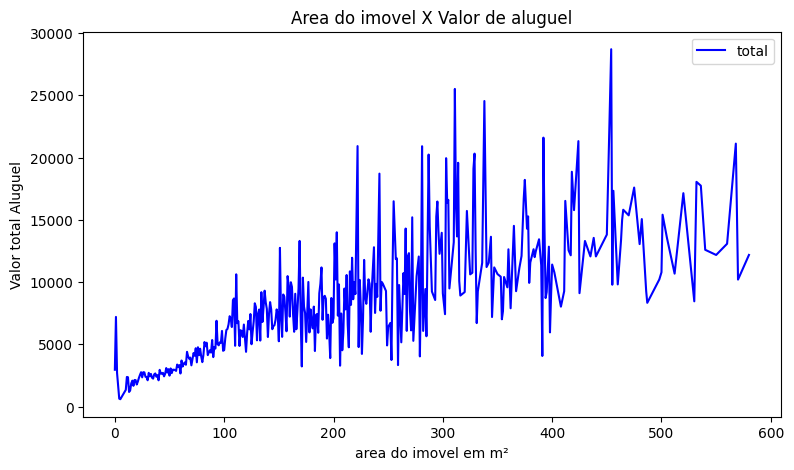

In [ ]:
#Criando um grafico com as informações do DataSet
from numpy import size
area_total.plot(
    title = 'Area do imovel X Valor de aluguel',
    kind= 'line',
    color= 'blue',
    ylabel= 'Valor total Aluguel',
    xlabel= 'area do imovel em m²',
    figsize=(9,5)
)

In [ ]:
#criando df por bairros com imoveis mais caros
df.groupby('district')[['area','total']].mean().sort_values('total', ascending=False)

,area,total
district,,
Cidade Jardim,420.0,20380.0
Alphaville Residencial Plus,420.0,20270.0
Alphaville Residencial Dois,540.0,17410.0
Jardim Cordeiro,400.0,16670.0
Jardim Vitoria Regia (zona Oeste),350.0,16480.0
...,...,...
Vila Lais,20.0,686.0
Jardim Frei Galvão,24.0,678.0
Jardim Inga,55.0,671.0


In [ ]:
grafico_preco_bairro = df.groupby('district')[['total','area']].mean().sort_values('total', ascending=False)

<Axes: ylabel='district'>

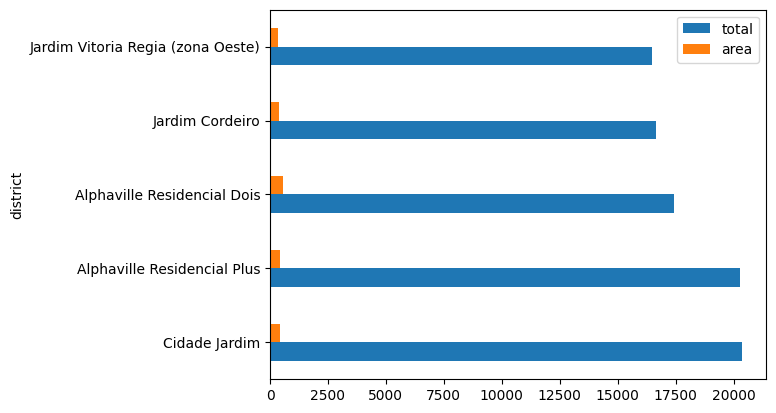

In [ ]:
grafico_preco_bairro[:5].plot(
    kind = 'barh'
)